<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="#About-the-Dataset">About the Dataset</a></li>
    <li><a href="#Importing-Data-Sets">Importing Data </a></li>
    <li><a href="#Data-Wrangling">Data Wrangling</a> </li>
    <li><a href="#Exploratory-Data-Analysis">Exploratory Data Analysis</a></li>
    <li><a href="#Model-Development">Model Development</a></li>
    <li><a href="#Model-Evaluation-and-Refinement">Model Evaluation and Refinement</a></li>
</a></li>


<hr>


# About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this course. 


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


## **Import the required libraries**


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge

from sklearn.pipeline import Pipeline
%matplotlib inline

from functions import *

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# Automatically Reload Changes 
%load_ext autoreload
%autoreload 2

# Importing Data Sets


Download the dataset by running the cell below.


In [9]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath, header='infer')


We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [11]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Display the data types

In [13]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We change column <code>"date"</code> to a date type and use the method describe to obtain a statistical summary of the dataframe.

In [15]:
df["date"] = pd.to_datetime(df["date"], format='%Y%m%dT%H%M%S')

# Data Wrangling


Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> 

In [18]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014-10-29 04:38:01.959931648,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,2014-05-02 00:00:00,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,NaN,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [20]:
missing_values_table(df)

Number of columns of this dataframe is 20.
Columns with missing values are 2.


,Missing Values,% of Total Values
bedrooms,13,0.1
bathrooms,10,0.0


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code>.

In [22]:
df = handle_missing_values(df)

Initial Missing Values by Column:
Column: bedrooms, Missing Values: 13, Type: float64
Column: bathrooms, Missing Values: 10, Type: float64

Missing Values by Column After Handling:
Column: date has no missing values.
Column: price has no missing values.
Column: bedrooms has no missing values.
Column: bathrooms has no missing values.
Column: sqft_living has no missing values.
Column: sqft_lot has no missing values.
Column: floors has no missing values.
Column: waterfront has no missing values.
Column: view has no missing values.
Column: condition has no missing values.
Column: grade has no missing values.
Column: sqft_above has no missing values.
Column: sqft_basement has no missing values.
Column: yr_built has no missing values.
Column: yr_renovated has no missing values.
Column: zipcode has no missing values.
Column: lat has no missing values.
Column: long has no missing values.
Column: sqft_living15 has no missing values.
Column: sqft_lot15 has no missing values.


# Exploratory Data Analysis


In [24]:
summarize_dataframe(df)


Data Total Number of Each Type:
 int64             13
float64            6
datetime64[ns]     1
Name: count, dtype: int64

Float Types Count:
 price        4028
bedrooms       13
bathrooms      30
floors          6
lat          5034
long          752
dtype: int64

Integer Types Count:
 sqft_living      1038
sqft_lot         9782
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
sqft_living15     777
sqft_lot15       8689
dtype: int64

Object Types Count:
 Series([], dtype: float64)

Data Dimension: (21613, 20)


In [25]:
df = convert_to_integer(df, min_unique=2, max_unique=30)

Converted columns to integer: ['bedrooms', 'bathrooms', 'floors']


In [26]:
summarize_dataframe(df)


Data Total Number of Each Type:
 int64             16
float64            3
datetime64[ns]     1
Name: count, dtype: int64

Float Types Count:
 price    4028
lat      5034
long      752
dtype: int64

Integer Types Count:
 bedrooms           12
bathrooms           9
sqft_living      1038
sqft_lot         9782
floors              3
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
sqft_living15     777
sqft_lot15       8689
dtype: int64

Object Types Count:
 Series([], dtype: float64)

Data Dimension: (21613, 20)


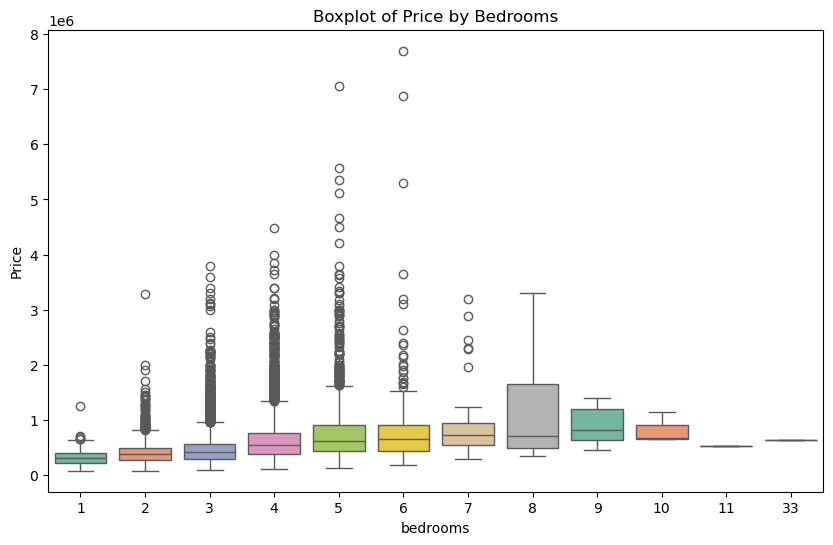

In [27]:
plot_boxplot_category(df, categorical_column='bedrooms', target_column='price',
                      title="Boxplot of Price by Bedrooms", x_label="bedrooms", y_label="Price")


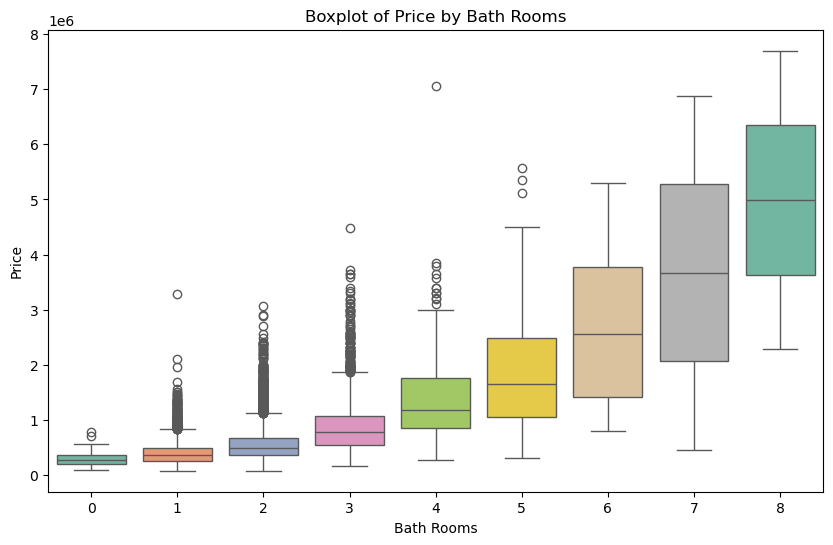

In [28]:
plot_boxplot_category(df, categorical_column='bathrooms', target_column='price',
                      title="Boxplot of Price by Bath Rooms", x_label="Bath Rooms", y_label="Price")

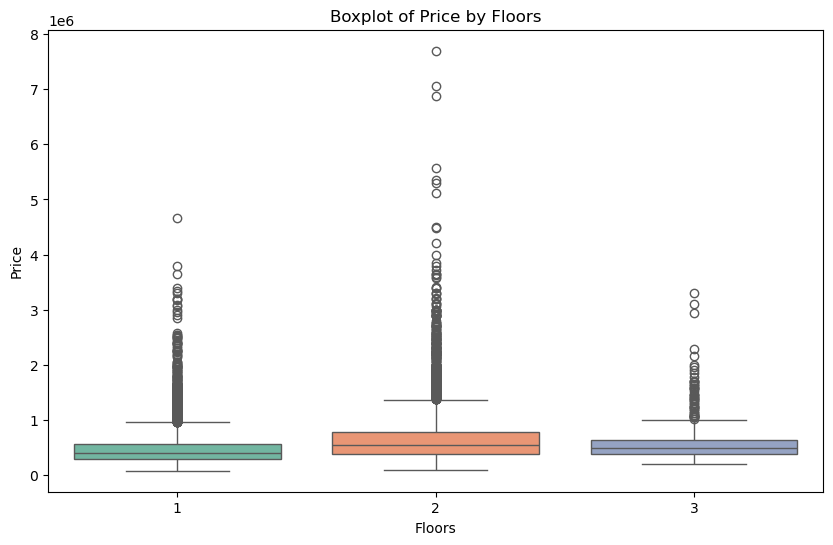

In [29]:
plot_boxplot_category(df, categorical_column='floors', target_column='price',
                      title="Boxplot of Price by Floors", x_label="Floors", y_label="Price")

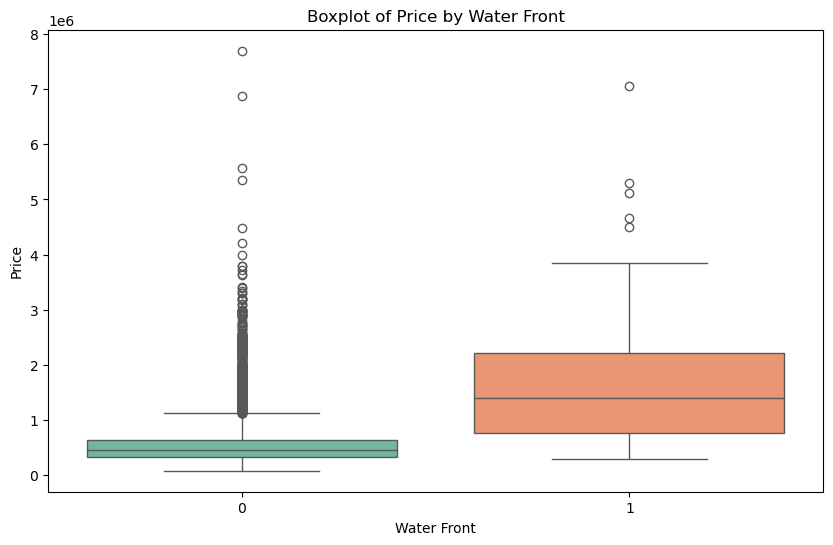

In [30]:
plot_boxplot_category(df, categorical_column='waterfront', target_column='price',
                      title="Boxplot of Price by Water Front", x_label="Water Front", y_label="Price")

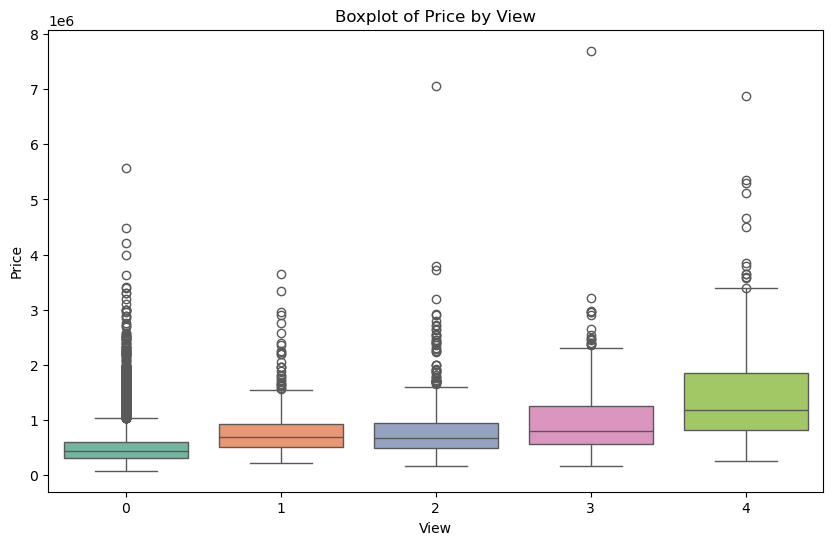

In [31]:
plot_boxplot_category(df, categorical_column='view', target_column='price',
                      title="Boxplot of Price by View", x_label="View", y_label="Price")

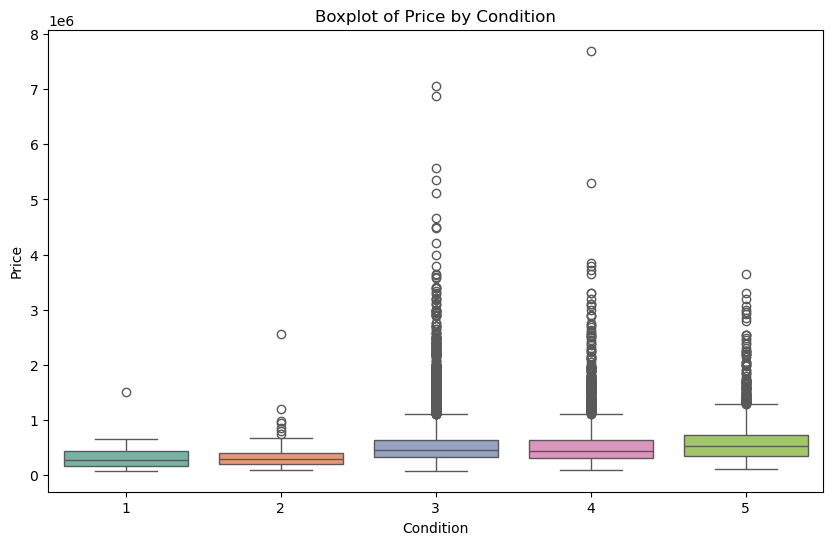

In [32]:
plot_boxplot_category(df, categorical_column='condition', target_column='price',
                      title="Boxplot of Price by Condition", x_label="Condition", y_label="Price")

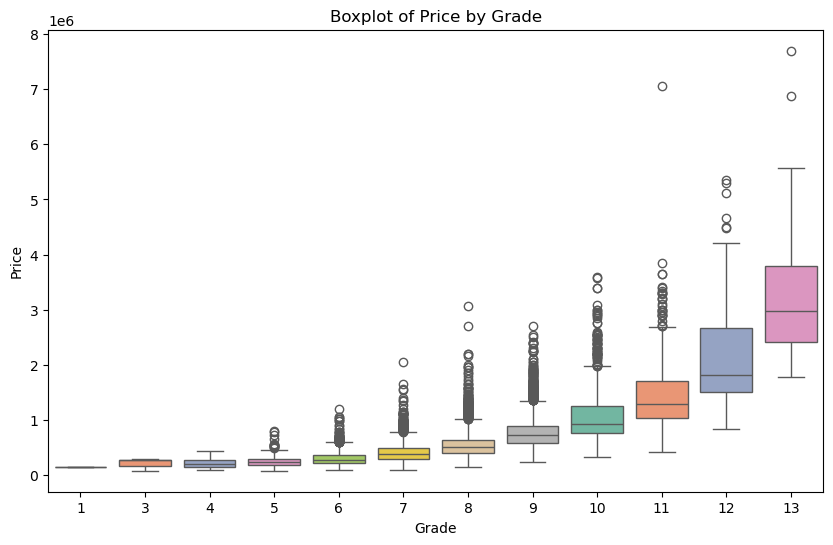

In [33]:
plot_boxplot_category(df, categorical_column='grade', target_column='price',
                      title="Boxplot of Price by Grade", x_label="Grade", y_label="Price")

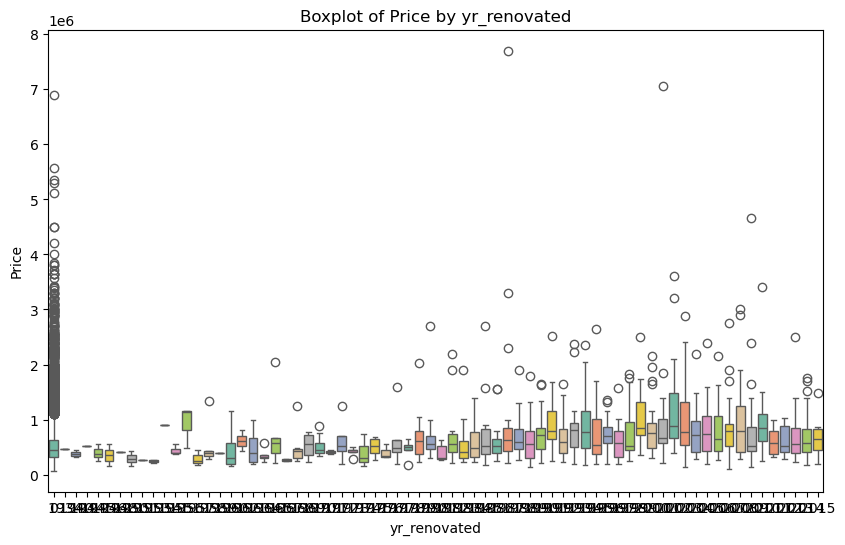

In [34]:
plot_boxplot_category(df, categorical_column='yr_renovated', target_column='price',
                      title="Boxplot of Price by yr_renovated", x_label="yr_renovated", y_label="Price")

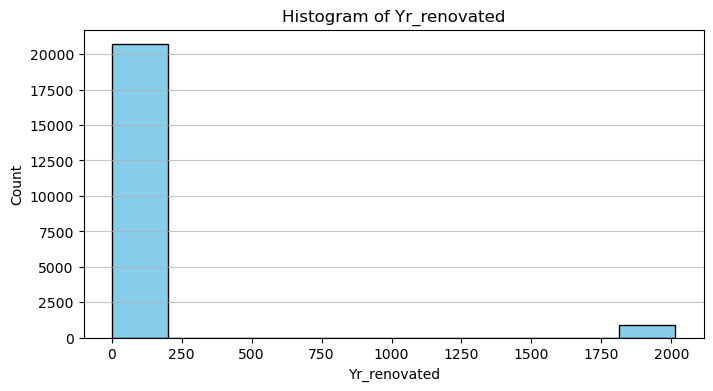

   yr_renovated yr_renovated-binned yr_renovated-binned-numeric
0             0               Bin 1                           1
1          1991               Bin 5                           5
2             0               Bin 1                           1
3             0               Bin 1                           1
4             0               Bin 1                           1
5             0               Bin 1                           1
6             0               Bin 1                           1
7             0               Bin 1                           1
8             0               Bin 1                           1
9             0               Bin 1                           1

Value counts for binned:
yr_renovated-binned
Bin 1    20716
Bin 7      261
Bin 6      248
Bin 5      186
Bin 4      121
Bin 3       46
Bin 2       35
Name: count, dtype: int64


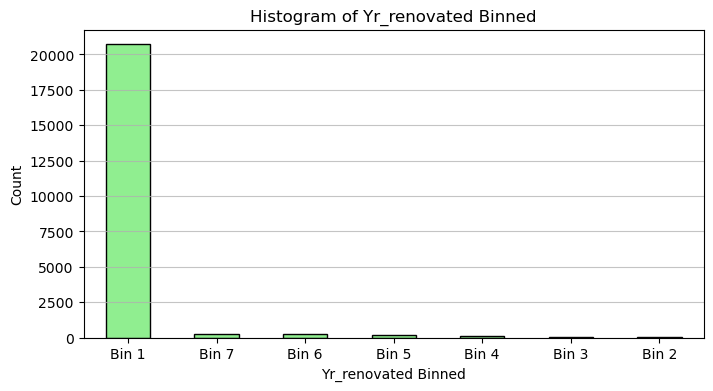

In [35]:
 df = boxplot_and_convert_bin(df, column_name='yr_renovated', num_bins=7)

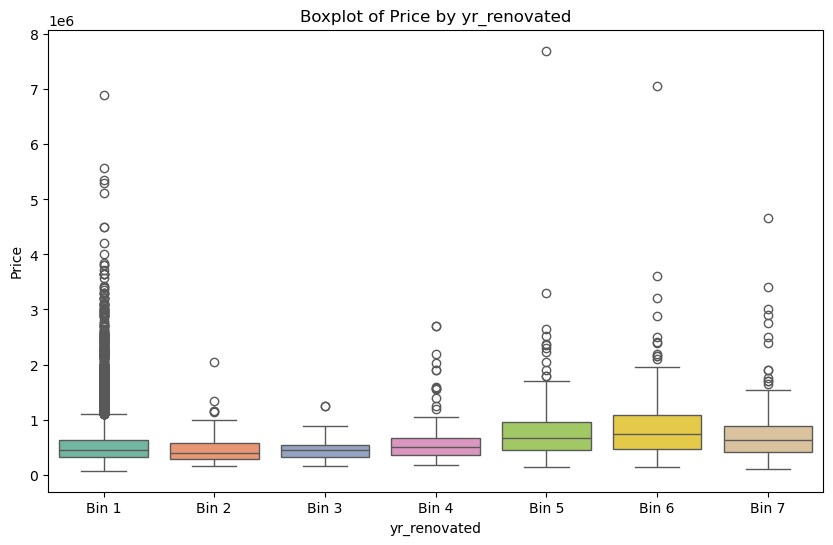

In [36]:
plot_boxplot_category(df, categorical_column='yr_renovated-binned', target_column='price',
                      title="Boxplot of Price by yr_renovated", x_label="yr_renovated", y_label="Price")

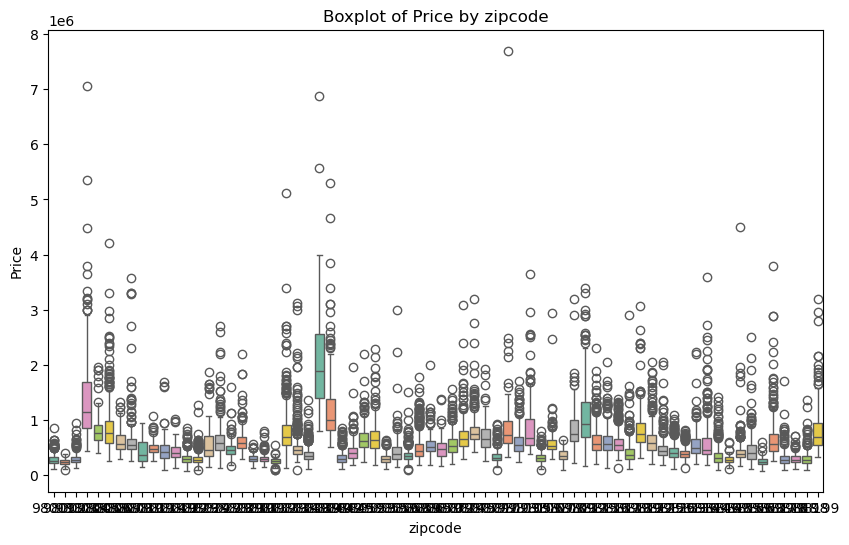

In [37]:
plot_boxplot_category(df, categorical_column='zipcode', target_column='price',
                      title="Boxplot of Price by zipcode", x_label="zipcode", y_label="Price")

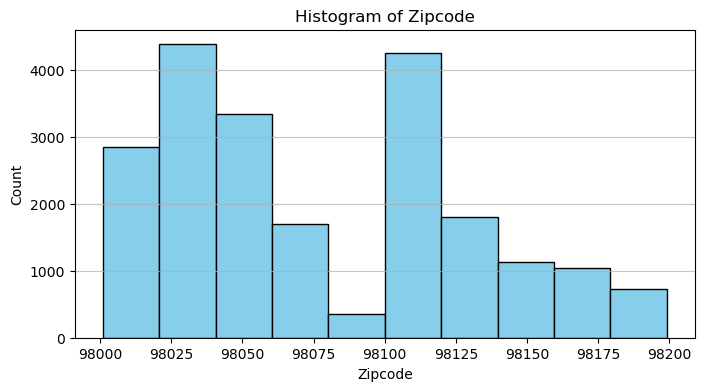

   zipcode zipcode-binned zipcode-binned-numeric
0    98178          Bin 7                      7
1    98125          Bin 6                      6
2    98028          Bin 2                      2
3    98136          Bin 6                      6
4    98074          Bin 4                      4
5    98053          Bin 3                      3
6    98003          Bin 1                      1
7    98198          Bin 7                      7
8    98146          Bin 6                      6
9    98038          Bin 3                      3

Value counts for binned:
zipcode-binned
Bin 3    3915
Bin 6    3687
Bin 4    3379
Bin 5    3014
Bin 2    2675
Bin 1    2667
Bin 7    2276
Name: count, dtype: int64


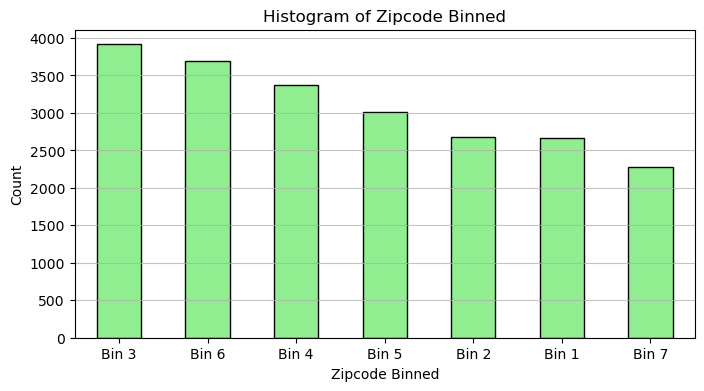

In [38]:
df = boxplot_and_convert_bin(df, column_name='zipcode', num_bins=7)

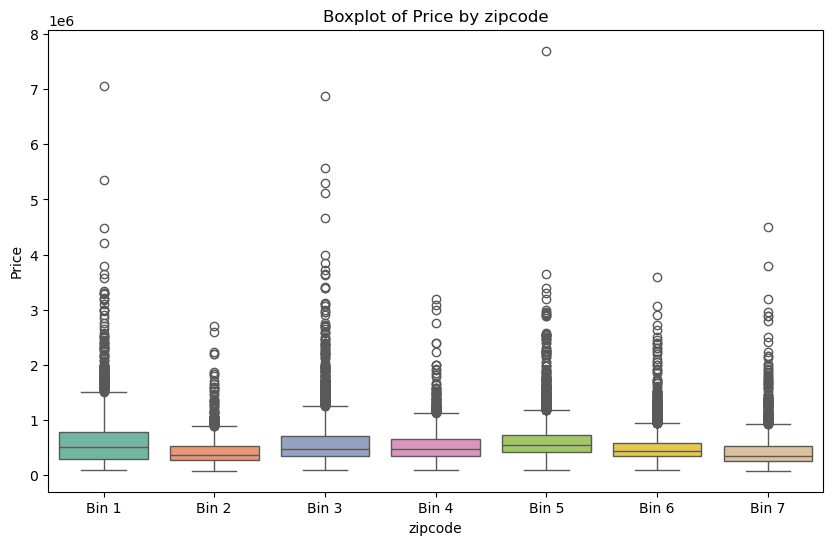

In [39]:
plot_boxplot_category(df, categorical_column='zipcode-binned', target_column='price',
                      title="Boxplot of Price by zipcode", x_label="zipcode", y_label="Price")

month_house_sold
5     2414
4     2231
7     2211
6     2180
8     1940
10    1878
3     1875
9     1774
12    1471
11    1411
2     1250
1      978
Name: count, dtype: int64
['10' '12' '2' '5' '6' '1' '4' '3' '7' '8' '11' '9']


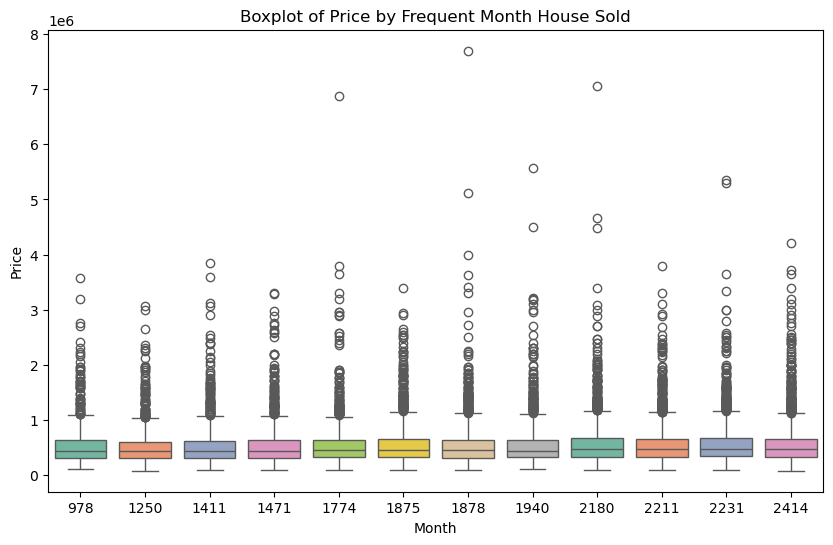

In [40]:
df['month_house_sold'] = df['date'].dt.month
df['month_house_sold'] = df['month_house_sold'].astype(str)
df['month_house_sold']
value_counts = df['month_house_sold'].value_counts()
print(value_counts)
print(df['month_house_sold'].unique())
df['month_house_sold_encoded'] = df['month_house_sold'].map(value_counts)
plot_boxplot_category(df, categorical_column='month_house_sold_encoded', target_column='price',
                      title="Boxplot of Price by Frequent Month House Sold", x_label="Month", y_label="Price")

In [41]:
pd.options.display.max_columns = 200
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated-binned,yr_renovated-binned-numeric,zipcode-binned,zipcode-binned-numeric,month_house_sold,month_house_sold_encoded
0,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Bin 1,1,Bin 7,7,10,1878
1,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Bin 5,5,Bin 6,6,12,1471
2,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Bin 1,1,Bin 2,2,2,1250
3,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Bin 1,1,Bin 6,6,12,1471
4,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Bin 1,1,Bin 4,4,2,1250


In [42]:
df[['date', 'month_house_sold', 'month_house_sold_encoded', 'yr_renovated', 'yr_renovated-binned-numeric', 
    'zipcode', 'zipcode-binned-numeric', 'price']].corr()

,date,month_house_sold,month_house_sold_encoded,yr_renovated,yr_renovated-binned-numeric,zipcode,zipcode-binned-numeric,price
date,1.000000,-0.346640,-0.336394,-0.024509,-0.024715,0.001404,0.001562,-0.004357
month_house_sold,-0.346640,1.000000,-0.078390,0.012827,0.011389,-0.000171,0.000187,-0.010081
month_house_sold_encoded,-0.336394,-0.078390,1.000000,0.015886,0.019119,0.003671,0.005262,0.034636
yr_renovated,-0.024509,0.012827,0.015886,1.000000,0.948148,0.064357,0.062218,0.126434
yr_renovated-binned-numeric,-0.024715,0.011389,0.019119,0.948148,1.000000,0.061279,0.059450,0.134624
zipcode,0.001404,-0.000171,0.003671,0.064357,0.061279,1.000000,0.973258,-0.053203
zipcode-binned-numeric,0.001562,0.000187,0.005262,0.062218,0.059450,0.973258,1.000000,-0.057813
price,-0.004357,-0.010081,0.034636,0.126434,0.134624,-0.053203,-0.057813,1.000000


In [43]:
df.drop(['date', 'month_house_sold', 'yr_renovated', 'yr_renovated-binned', 'zipcode', 'zipcode-binned'], axis = 1, inplace =True)
df.rename(columns = {'yr_renovated-binned-numeric': 'yr_renovated_binned','zipcode-binned-numeric': 'zipcode_binned', 
                     'month_house_sold_encoded': 'month_house_sold'}, inplace =True)

In [44]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,yr_renovated_binned,zipcode_binned,month_house_sold
price,1.000000,0.308868,0.510413,0.702035,0.089661,0.237211,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.307003,0.021626,0.585379,0.082447,0.134624,-0.057813,0.034636
bedrooms,0.308868,1.000000,0.465558,0.578147,0.032253,0.157938,-0.006778,0.080031,0.026898,0.356770,0.479287,0.303001,0.155635,-0.009650,0.130862,0.393319,0.030310,0.028698,-0.154861,0.006550
bathrooms,0.510413,0.465558,1.000000,0.698165,0.085455,0.486026,0.058764,0.177758,-0.127166,0.605957,0.640527,0.250373,0.434213,0.031026,0.181058,0.510545,0.081092,0.075486,-0.157104,0.012584
sqft_living,0.702035,0.578147,0.698165,1.000000,0.172826,0.353321,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.052529,0.240223,0.756420,0.183286,0.064052,-0.204085,0.017279
sqft_lot,0.089661,0.032253,0.085455,0.172826,1.000000,-0.008951,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,-0.085683,0.229521,0.144608,0.718557,0.003583,-0.133213,-0.005107
floors,0.237211,0.157938,0.486026,0.353321,-0.008951,1.000000,0.019640,0.024658,-0.293173,0.472608,0.517913,-0.235836,0.578619,0.029567,0.159001,0.296561,-0.013252,-0.003984,-0.082053,0.006561
waterfront,0.266369,-0.006778,0.058764,0.103818,0.021604,0.019640,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,-0.014274,-0.041910,0.086463,0.030703,0.071937,0.028749,-0.004057
view,0.397293,0.080031,0.177758,0.284611,0.074710,0.024658,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.006157,-0.078400,0.280439,0.072575,0.092905,0.068540,-0.000663
condition,0.036362,0.026898,-0.127166,-0.058753,-0.008958,-0.293173,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.014941,-0.106500,-0.092824,-0.003406,-0.075972,0.000282,0.019064
grade,0.667434,0.356770,0.605957,0.762704,0.113621,0.472608,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.114084,0.198372,0.713202,0.119248,0.030473,-0.190594,0.024952


In [45]:
df.corr()['price'].sort_values()

zipcode_binned        -0.057813
long                   0.021626
month_house_sold       0.034636
condition              0.036362
yr_built               0.054012
sqft_lot15             0.082447
sqft_lot               0.089661
yr_renovated_binned    0.134624
floors                 0.237211
waterfront             0.266369
lat                    0.307003
bedrooms               0.308868
sqft_basement          0.323816
view                   0.397293
bathrooms              0.510413
sqft_living15          0.585379
sqft_above             0.605567
grade                  0.667434
sqft_living            0.702035
price                  1.000000
Name: price, dtype: float64

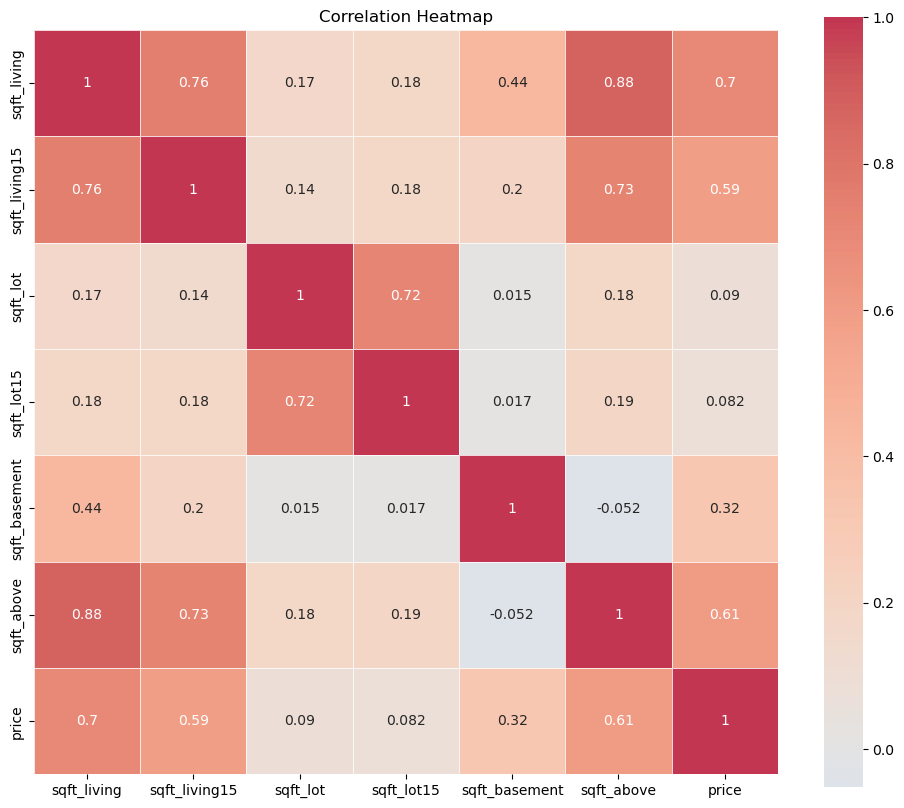

In [46]:
sqft_features = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_basement', 'sqft_above', 'price']
plot_corr_heatmap(df[sqft_features])

<Axes: xlabel='sqft_living', ylabel='price'>

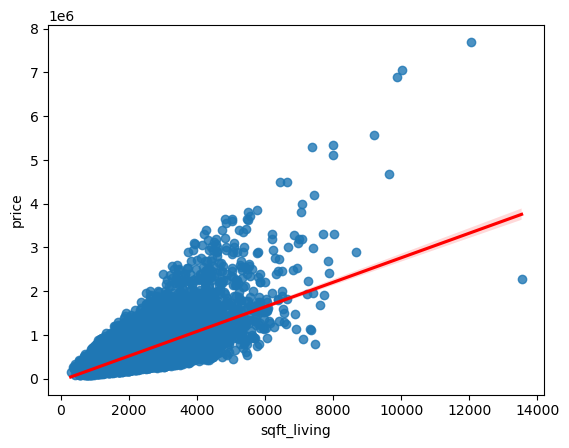

In [47]:
sns.regplot(x="sqft_living", y="price", data=df, line_kws={"color": "red"})

<Axes: xlabel='sqft_above', ylabel='price'>

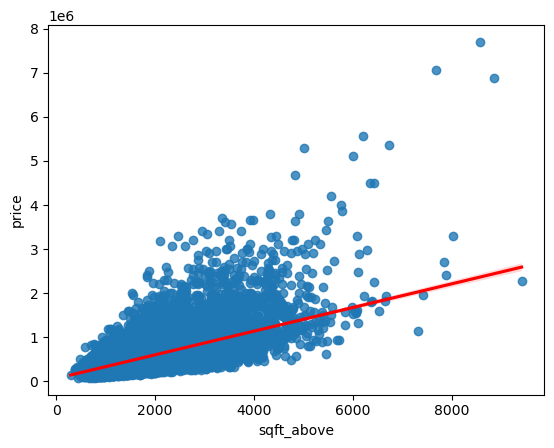

In [48]:
sns.regplot(x="sqft_above", y="price", data=df, line_kws={"color": "red"})

<Axes: xlabel='sqft_living15', ylabel='price'>

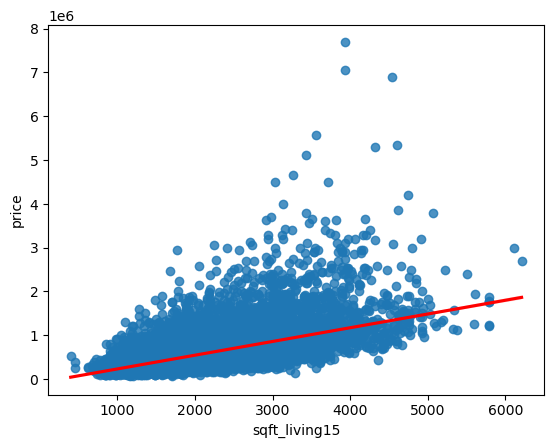

In [49]:
sns.regplot(x="sqft_living15", y="price", data=df, line_kws={"color": "red"})

<Axes: xlabel='sqft_lot', ylabel='price'>

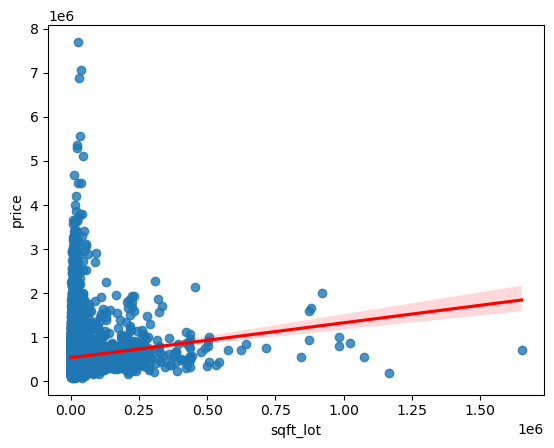

In [50]:
sns.regplot(x="sqft_lot", y="price", data=df, line_kws={"color": "red"})

<Axes: xlabel='sqft_lot15', ylabel='price'>

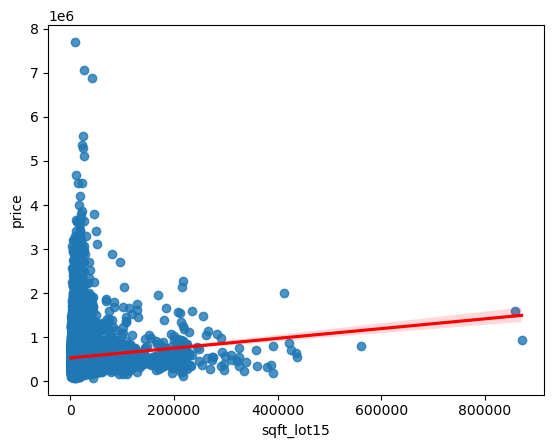

In [51]:
sns.regplot(x="sqft_lot15", y="price", data=df, line_kws={"color": "red"})

<Axes: xlabel='sqft_basement', ylabel='price'>

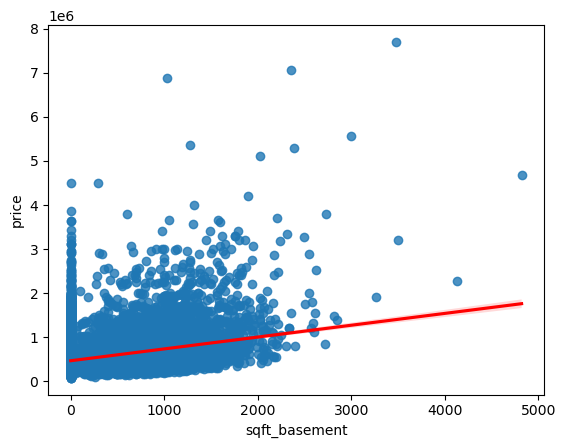

In [52]:
sns.regplot(x="sqft_basement", y="price", data=df, line_kws={"color": "red"})

In [53]:
sqft_features = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_basement', 'sqft_above']
df[sqft_features].describe()

,sqft_living,sqft_living15,sqft_lot,sqft_lot15,sqft_basement,sqft_above
count,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000
mean,2079.899736,1986.552492,1.510697e+04,12768.455652,291.509045,1788.390691
std,918.440897,685.391304,4.142051e+04,27304.179631,442.575043,828.090978
min,290.000000,399.000000,5.200000e+02,651.000000,0.000000,290.000000
25%,1427.000000,1490.000000,5.040000e+03,5100.000000,0.000000,1190.000000
50%,1910.000000,1840.000000,7.618000e+03,7620.000000,0.000000,1560.000000
75%,2550.000000,2360.000000,1.068800e+04,10083.000000,560.000000,2210.000000
max,13540.000000,6210.000000,1.651359e+06,871200.000000,4820.000000,9410.000000


In [54]:
sqft_features = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_basement', 'sqft_above']
for feature in sqft_features:
    non_positive_values = df[df[feature] <= 0]  
    if not non_positive_values.empty:
        print(f"Feature '{feature}' contains non-positive values:")
        print(non_positive_values[[feature]])

Feature 'sqft_basement' contains non-positive values:
       sqft_basement
0                  0
2                  0
4                  0
6                  0
7                  0
...              ...
21608              0
21609              0
21610              0
21611              0
21612              0

[13126 rows x 1 columns]


In [55]:
df = transform_to_log(df, sqft_features)

In [56]:
df.corr()['price'].sort_values()

zipcode_binned        -0.057813
long                   0.021626
month_house_sold       0.034636
condition              0.036362
yr_built               0.054012
sqft_lot15             0.082447
sqft_lot               0.089661
yr_renovated_binned    0.134624
log_sqft_lot15         0.147579
log_sqft_lot           0.161318
log_sqft_basement      0.207952
floors                 0.237211
waterfront             0.266369
lat                    0.307003
bedrooms               0.308868
sqft_basement          0.323910
view                   0.397293
bathrooms              0.510413
log_sqft_above         0.542734
log_sqft_living15      0.543988
sqft_living15          0.585379
sqft_above             0.605567
log_sqft_living        0.611704
grade                  0.667434
sqft_living            0.702035
price                  1.000000
Name: price, dtype: float64

<Axes: xlabel='log_sqft_living', ylabel='price'>

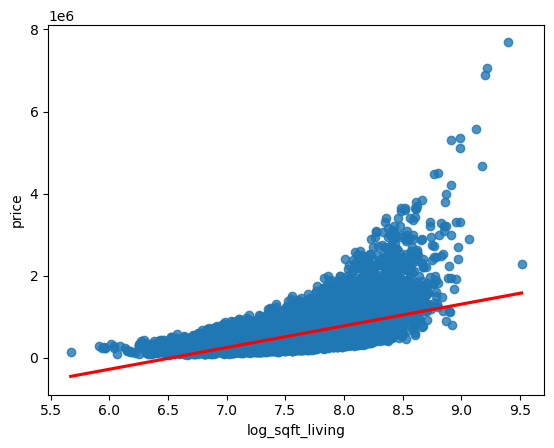

In [57]:
sns.regplot(x="log_sqft_living", y="price", data=df, line_kws={"color": "red"})

<Axes: xlabel='log_sqft_lot', ylabel='price'>

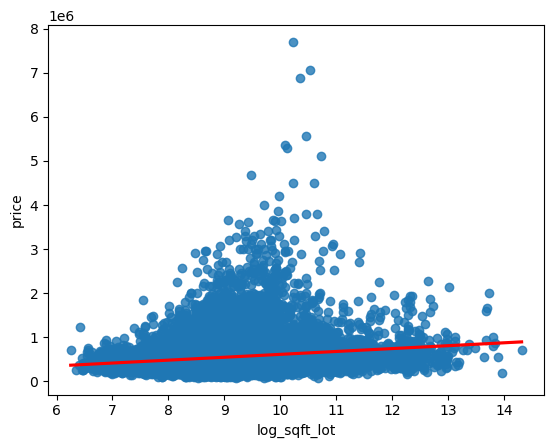

In [58]:
sns.regplot(x="log_sqft_lot", y="price", data=df, line_kws={"color": "red"})

In [59]:
summarize_dataframe(df)


Data Total Number of Each Type:
 int64       15
float64      9
category     2
Name: count, dtype: int64

Float Types Count:
 price                4028
lat                  5034
long                  752
log_sqft_living      1038
log_sqft_living15     777
log_sqft_lot         9782
log_sqft_lot15       8689
log_sqft_basement     306
log_sqft_above        946
dtype: int64

Integer Types Count:
 bedrooms              12
bathrooms              9
sqft_living         1038
sqft_lot            9782
floors                 3
waterfront             2
view                   5
condition              5
grade                 12
sqft_above           946
sqft_basement        306
yr_built             116
sqft_living15        777
sqft_lot15          8689
month_house_sold      12
dtype: int64

Object Types Count:
 Series([], dtype: float64)

Data Dimension: (21613, 26)


In [60]:
df2 = df.copy()
df2 = convert_to_categorical(df2, min_unique=2, max_unique=20)
df2

Converted columns to categorical: ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'month_house_sold']


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,yr_renovated_binned,zipcode_binned,month_house_sold,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,log_sqft_basement,log_sqft_above
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,1,1955,47.5112,-122.257,1340,5650,1,7,1878,7.073270,7.200425,8.639411,8.639411,0.000000,7.073270
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639,5,6,1471,7.851661,7.432484,8.887653,8.941022,5.991465,7.682482
2,180000.0,2,1,770,10000,1,0,0,3,6,770,1,1933,47.7379,-122.233,2720,8062,1,2,1250,6.646391,7.908387,9.210340,8.994917,0.000000,6.646391
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000,1,6,1471,7.580700,7.215240,8.517193,8.517193,6.813445,6.956545
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,1,1987,47.6168,-122.045,1800,7503,1,4,1250,7.426549,7.495542,8.997147,8.923058,0.000000,7.426549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2,1530,1131,3,0,0,3,8,1530,1,2009,47.6993,-122.346,1530,1509,1,5,2414,7.333023,7.333023,7.030857,7.319202,0.000000,7.333023
21609,400000.0,4,2,2310,5813,2,0,0,3,8,2310,1,2014,47.5107,-122.362,1830,7200,1,6,1250,7.745003,7.512071,8.667852,8.881836,0.000000,7.745003
21610,402101.0,2,0,1020,1350,2,0,0,3,7,1020,1,2009,47.5944,-122.299,1020,2007,1,6,2180,6.927558,6.927558,7.207860,7.604396,0.000000,6.927558
21611,400000.0,3,2,1600,2388,2,0,0,3,8,1600,1,2004,47.5345,-122.069,1410,1287,1,2,978,7.377759,7.251345,7.778211,7.160069,0.000000,7.377759


In [61]:
df2 = encode_and_one_hot(df2)
df2

DataFrame shape before encoding: (21613, 26)
Label-encoded columns: ['waterfront']
One-hot encoded columns: ['bathrooms', 'condition', 'view', 'grade', 'bedrooms', 'yr_renovated_binned', 'month_house_sold', 'zipcode_binned', 'floors']
DataFrame shape after encoding: (21613, 80)


,price,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,log_sqft_basement,log_sqft_above,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_33,bathrooms_1,bathrooms_2,bathrooms_3,bathrooms_4,bathrooms_5,bathrooms_6,bathrooms_7,bathrooms_8,floors_2,floors_3,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,yr_renovated_binned_2,yr_renovated_binned_3,yr_renovated_binned_4,yr_renovated_binned_5,yr_renovated_binned_6,yr_renovated_binned_7,zipcode_binned_2,zipcode_binned_3,zipcode_binned_4,zipcode_binned_5,zipcode_binned_6,zipcode_binned_7,month_house_sold_1250,month_house_sold_1411,month_house_sold_1471,month_house_sold_1774,month_house_sold_1875,month_house_sold_1878,month_house_sold_1940,month_house_sold_2180,month_house_sold_2211,month_house_sold_2231,month_house_sold_2414
0,221900.0,1180,5650,0,1180,1,1955,47.5112,-122.257,1340,5650,7.073270,7.200425,8.639411,8.639411,0.000000,7.073270,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
1,538000.0,2570,7242,0,2170,400,1951,47.7210,-122.319,1690,7639,7.851661,7.432484,8.887653,8.941022,5.991465,7.682482,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
2,180000.0,770,10000,0,770,1,1933,47.7379,-122.233,2720,8062,6.646391,7.908387,9.210340,8.994917,0.000000,6.646391,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,604000.0,1960,5000,0,1050,910,1965,47.5208,-122.393,1360,5000,7.580700,7.215240,8.517193,8.517193,6.813445,6.956545,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
4,510000.0,1680,8080,0,1680,1,1987,47.6168,-122.045,1800,7503,7.426549,7.495542,8.997147,8.923058,0.000000,7.426549,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,1530,1131,0,1530,1,2009,47.6993,-122.346,1530,1509,7.333023,7.333023,7.030857,7.319202,0.000000,7.333023,False,True,False,False,False,Fa

# Model Development

In [63]:
sqft_features = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_basement', 'sqft_above', 'price']
log_sqft_features = ['log_sqft_living', 'log_sqft_living15', 'log_sqft_lot', 'log_sqft_lot15', 'log_sqft_basement', 'log_sqft_above', 'price']

X1 = df.drop(columns=log_sqft_features)
X2 = df2.drop(columns=log_sqft_features)

X3 = df.drop(columns=sqft_features)
X4 = df2.drop(columns=sqft_features)
Y = df['price']

In [64]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y, test_size=0.30, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, Y, test_size=0.30, random_state=42)
x3_train, x3_test, y3_train, y3_test = train_test_split(X3, Y, test_size=0.30, random_state=42)
x4_train, x4_test, y4_train, y4_test = train_test_split(X4, Y, test_size=0.30, random_state=42)
print("X train data shape:",x4_train.shape)
print("Y train data shape:",y4_train.shape)
print("X test data shape:", x4_test.shape)
print("Y test data shape:", y4_test.shape)

X train data shape: (15129, 73)
Y train data shape: (15129,)
X test data shape: (6484, 73)
Y test data shape: (6484,)


In [65]:
lm = LinearRegression()

evaluate_model(lm, x1_train, x1_test, y1_train, y1_test)

R²: 0.7014
MSE: 43108011851.7884


In [66]:
evaluate_model(lm, x2_train, x2_test, y2_train, y2_test)

R²: 0.6971
MSE: 43726064501.4008


In [67]:
evaluate_model(lm, x3_train, x3_test, y3_train, y3_test)

R²: 0.6697
MSE: 47686408323.1840


In [68]:
evaluate_model(lm, x4_train, x4_test, y4_train, y4_test)

R²: 0.6899
MSE: 44761467999.3135


In [69]:
pr = PolynomialFeatures(degree=2, include_bias=False)
x1_train_pr = pr.fit_transform(x1_train)
x1_test_pr = pr.fit_transform(x1_test)
x2_train_pr = pr.fit_transform(x2_train)
x2_test_pr = pr.fit_transform(x2_test)
x3_train_pr = pr.fit_transform(x3_train)
x3_test_pr = pr.fit_transform(x3_test)
x4_train_pr = pr.fit_transform(x4_train)
x4_test_pr = pr.fit_transform(x4_test)

In [70]:
evaluate_model(lm, x1_train_pr, x1_test_pr, y1_train, y1_test)

R²: 0.8028
MSE: 28474955963.5670


In [71]:
evaluate_model(lm, x2_train_pr, x2_test_pr, y2_train, y2_test)

R²: -12449.7530
MSE: 1797472021967690.5000


In [72]:
evaluate_model(lm, x3_train_pr, x3_test_pr, y3_train, y3_test)

R²: 0.7999
MSE: 28890891320.2219


In [73]:
evaluate_model(lm, x4_train_pr, x4_test_pr, y4_train, y4_test)

R²: -221627.9174
MSE: 31995798110146052.0000


In [74]:
print("X train data shape:",x1_train.shape)

X train data shape: (15129, 19)


# Model Evaluation and Refinement


Processing degree 3: 100%|██████████| 3/3 [00:17<00:00,  5.79s/it]


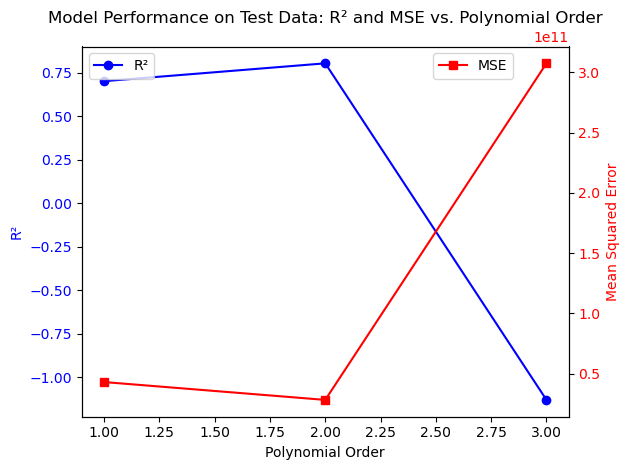

Cross-Validation Results:
Degree 1: Mean R² = 0.7013, Std = 0.0110
Degree 2: Mean R² = 0.8175, Std = 0.0120
Degree 3: Mean R² = -2344719250235374592.0000, Std = 3781703010474493440.0000

Best Model (Test Data):
Best polynomial order: 2
Highest R²: 0.8039
Lowest MSE: 28312130275.8781

Best Model (Cross-Validation):
Best polynomial order: 2
Mean R²: 0.8175
Standard Deviation: 0.0120


In [76]:
from tqdm import tqdm

Rsqu_test = []
MSE_test = []
CV_scores_mean = []
CV_scores_std = []

order = [1, 2, 3]
pbar = tqdm(order)

for n in pbar:
    # Update progress bar description
    pbar.set_description(f"Processing degree {n}")
    
    # Create pipeline
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=n, include_bias=False)),
        ('linear', LinearRegression())
    ])

    pipe.fit(x1_train, y1_train)
    y_pred = pipe.predict(x1_test)
                           
    # Evaluate performance
    Rsqu_test.append(r2_score(y1_test, y_pred))
    MSE_test.append(mean_squared_error(y1_test, y_pred))
    
    # Perform cross-validation
    cv_scores = cross_val_score(pipe, x1_train, y1_train, cv=5, scoring='r2')
    CV_scores_mean.append(cv_scores.mean())
    CV_scores_std.append(cv_scores.std())

# Plot R² and MSE
fig, ax1 = plt.subplots()

# R² Plot
ax1.plot(order, Rsqu_test, 'b-o', label="R²")
ax1.set_xlabel("Polynomial Order")
ax1.set_ylabel("R²", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.legend(loc='upper left')

# MSE Plot
ax2 = ax1.twinx()
ax2.plot(order, MSE_test, 'r-s', label="MSE")
ax2.set_ylabel("Mean Squared Error", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.legend(loc='upper right', bbox_to_anchor=(0.9, 1))

# Add title
plt.title("Model Performance on Test Data: R² and MSE vs. Polynomial Order")
fig.tight_layout()
plt.show()

# Cross-Validation Results
print("Cross-Validation Results:")
for i, n in enumerate(order):
    print(f"Degree {n}: Mean R² = {CV_scores_mean[i]:.4f}, Std = {CV_scores_std[i]:.4f}")

# Output the best combination based on R² and MSE
best_index = max(range(len(Rsqu_test)), key=lambda i: (Rsqu_test[i], -MSE_test[i]))
print("\nBest Model (Test Data):")
print(f"Best polynomial order: {order[best_index]}")
print(f"Highest R²: {Rsqu_test[best_index]:.4f}")
print(f"Lowest MSE: {MSE_test[best_index]:.4f}")

# Output the best cross-validated score
best_cv_index = max(range(len(CV_scores_mean)), key=lambda i: CV_scores_mean[i])
print("\nBest Model (Cross-Validation):")
print(f"Best polynomial order: {order[best_cv_index]}")
print(f"Mean R²: {CV_scores_mean[best_cv_index]:.4f}")
print(f"Standard Deviation: {CV_scores_std[best_cv_index]:.4f}")

# Ridge Regression

In [78]:
pipe2 = Pipeline([ 
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=0.1))
])

pipe2.fit(x1_train,y1_train)

yhat_test=pipe2.predict(x1_test)

print(f"R² is: {r2_score(y1_test, yhat_test):.4f}")
print(f"MSE is: {mean_squared_error(y1_test, yhat_test):.4f}")

R² is: 0.8039
MSE is: 28316785650.8307


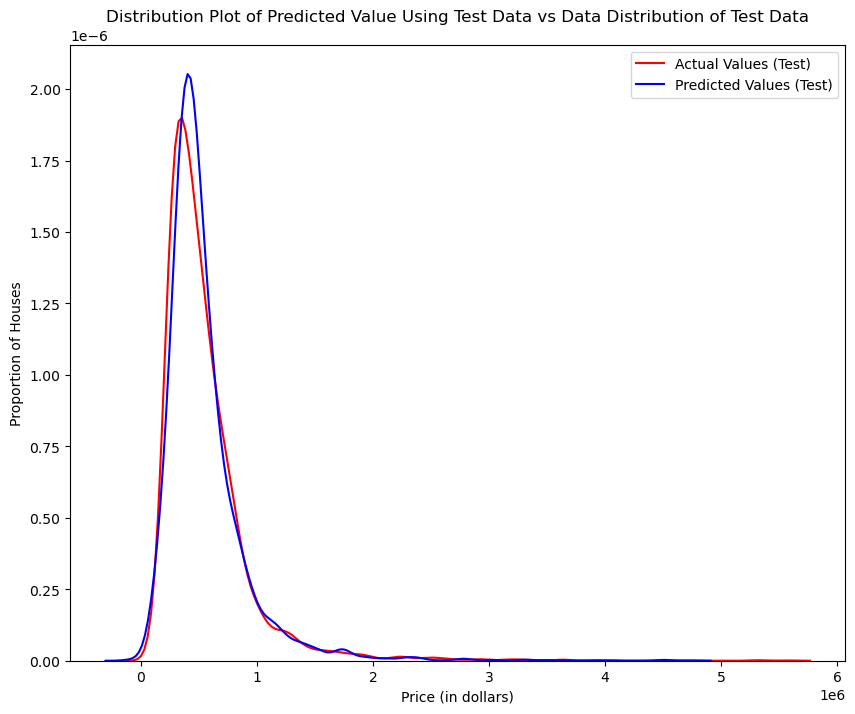

In [79]:
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y1_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Processing degree 3: 100%|██████████| 3/3 [00:05<00:00,  1.75s/it]


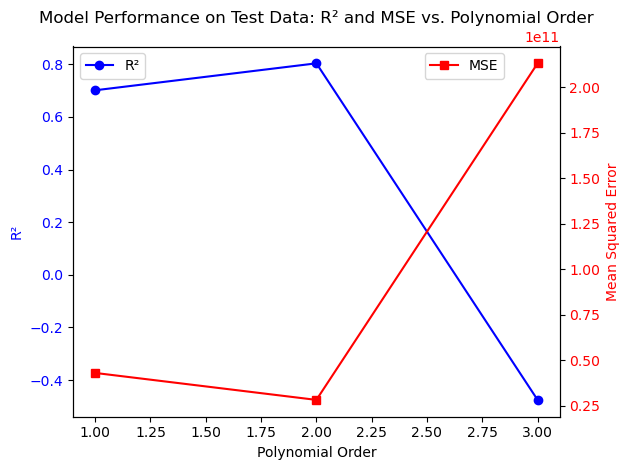

Cross-Validation Results:
Degree 1: Mean R² = 0.7016, Std = 0.0107
Degree 2: Mean R² = 0.8198, Std = 0.0119
Degree 3: Mean R² = -1.2807, Std = 3.7215

Best Model (Test Data):
Best polynomial order: 2
Highest R²: 0.8039
Lowest MSE: 28316785650.8307

Best Model (Cross-Validation):
Best polynomial order: 2
Mean R²: 0.8198
Standard Deviation: 0.0119


In [80]:

Rsqu_test = []
MSE_test = []
CV_scores_mean = []
CV_scores_std = []

order = [1, 2, 3]
pbar = tqdm(order)

for n in pbar:
    # Update progress bar description
    pbar.set_description(f"Processing degree {n}")
    
    # Create pipeline
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=n, include_bias=False)),
        ('ridge', Ridge(alpha=0.1))
    ])

    pipe.fit(x1_train, y1_train)
    y_pred = pipe.predict(x1_test)
                           
    # Evaluate performance
    Rsqu_test.append(r2_score(y1_test, y_pred))
    MSE_test.append(mean_squared_error(y1_test, y_pred))
    
    # Perform cross-validation
    cv_scores = cross_val_score(pipe, x1_train, y1_train, cv=5, scoring='r2')
    CV_scores_mean.append(cv_scores.mean())
    CV_scores_std.append(cv_scores.std())

# Plot R² and MSE
fig, ax1 = plt.subplots()

# R² Plot
ax1.plot(order, Rsqu_test, 'b-o', label="R²")
ax1.set_xlabel("Polynomial Order")
ax1.set_ylabel("R²", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.legend(loc='upper left')

# MSE Plot
ax2 = ax1.twinx()
ax2.plot(order, MSE_test, 'r-s', label="MSE")
ax2.set_ylabel("Mean Squared Error", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.legend(loc='upper right', bbox_to_anchor=(0.9, 1))

# Add title
plt.title("Model Performance on Test Data: R² and MSE vs. Polynomial Order")
fig.tight_layout()
plt.show()

# Cross-Validation Results
print("Cross-Validation Results:")
for i, n in enumerate(order):
    print(f"Degree {n}: Mean R² = {CV_scores_mean[i]:.4f}, Std = {CV_scores_std[i]:.4f}")

# Output the best combination based on R² and MSE
best_index = max(range(len(Rsqu_test)), key=lambda i: (Rsqu_test[i], -MSE_test[i]))
print("\nBest Model (Test Data):")
print(f"Best polynomial order: {order[best_index]}")
print(f"Highest R²: {Rsqu_test[best_index]:.4f}")
print(f"Lowest MSE: {MSE_test[best_index]:.4f}")

# Output the best cross-validated score
best_cv_index = max(range(len(CV_scores_mean)), key=lambda i: CV_scores_mean[i])
print("\nBest Model (Cross-Validation):")
print(f"Best polynomial order: {order[best_cv_index]}")
print(f"Mean R²: {CV_scores_mean[best_cv_index]:.4f}")
print(f"Standard Deviation: {CV_scores_std[best_cv_index]:.4f}")


# Grid Search

In [82]:
# Define hyperparameter space
alpha_values = np.logspace(-4, 4, 100)  

# Set up the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),  
    ('ridge', Ridge())
])

param_distributions = {
    'ridge__alpha': alpha_values,
    'poly__degree': [1, 2, 3]  
}

random_search = RandomizedSearchCV(
    pipe,
    param_distributions,
    n_iter=30,  
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(x1_train, y1_train)

best_alpha = random_search.best_params_['ridge__alpha']
best_degree = random_search.best_params_['poly__degree']
best_model = random_search.best_estimator_
best_cv_score = random_search.best_score_

test_score = best_model.score(x1_test, y1_test)
yhat_test = best_model.predict(x1_test)
test_mse = mean_squared_error(y1_test, yhat_test)

print(f"Best Alpha: {best_alpha:.6f}")
print(f"Best Polynomial Degree: {best_degree}")
print(f"Highest Cross-Validated R²: {best_cv_score:.4f}")
print(f"Test Data R²: {test_score:.4f}")
print(f"Mean Squared Error (MSE) on Test Data: {test_mse:.4f}")



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Alpha: 114.975700
Best Polynomial Degree: 2
Highest Cross-Validated R²: 0.8203
Test Data R²: 0.8042
Mean Squared Error (MSE) on Test Data: 28268522665.2253


### Analyze the results

In [84]:
results = random_search.cv_results_
sorted_results = sorted(zip(results['mean_test_score'], results['param_ridge__alpha'], results['param_poly__degree']), reverse=True)
for score, alpha, degree in sorted_results[:10]:  
    print(f"R²: {score:.4f}, Alpha: {alpha}, Degree: {degree}")


R²: 0.8203, Alpha: 114.9756995397738, Degree: 2
R²: 0.8202, Alpha: 422.9242874389508, Degree: 2
R²: 0.8199, Alpha: 17.886495290574352, Degree: 2
R²: 0.8198, Alpha: 4.037017258596558, Degree: 2
R²: 0.8198, Alpha: 1.592282793341094, Degree: 2
R²: 0.8198, Alpha: 0.7564633275546291, Degree: 2
R²: 0.8191, Alpha: 0.0011233240329780276, Degree: 2
R²: 0.8188, Alpha: 0.0005336699231206312, Degree: 2
R²: 0.8184, Alpha: 0.00021049041445120198, Degree: 2
R²: 0.7981, Alpha: 4750.810162102803, Degree: 3


### Refine the search 

In [86]:
param_grid = {
    'ridge__alpha': np.linspace(best_alpha - 0.1, best_alpha + 0.1, 10),
    'poly__degree': [best_degree - 1, best_degree, best_degree + 1]
}

grid_search = GridSearchCV(
    pipe,
    param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(x1_train, y1_train)

print(f"Best Grid Search Alpha: {grid_search.best_params_['ridge__alpha']}")
print(f"Best Grid Search Degree: {grid_search.best_params_['poly__degree']}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Grid Search Alpha: 115.0756995397738
Best Grid Search Degree: 2


### Evaluate the best model

In [88]:

best_alpha = grid_search.best_params_['ridge__alpha']
best_degree = grid_search.best_params_['poly__degree']
best_model = grid_search.best_estimator_
best_cv_score = grid_search.best_score_

test_score = best_model.score(x1_test, y1_test)
yhat_test = best_model.predict(x1_test)
test_mse = mean_squared_error(y1_test, yhat_test)
mae = mean_absolute_error(y1_test, yhat_test)

print(f"Best Alpha: {best_alpha:.6f}")
print(f"Best Polynomial Degree: {best_degree}")
print(f"Highest Cross-Validated R²: {best_cv_score:.4f}")
print(f"Test Data R²: {test_score:.4f}")
print(f"Mean Squared Error (MSE) on Test Data: {test_mse:.4f}")
print(f"Mean Absolute Error (MAE) on Test Data: {mae:.4f}")


Best Alpha: 115.075700
Best Polynomial Degree: 2
Highest Cross-Validated R²: 0.8203
Test Data R²: 0.8042
Mean Squared Error (MSE) on Test Data: 28268495367.3358
Mean Absolute Error (MAE) on Test Data: 102447.0805


In [89]:
# Comparing Predictions with Actual Outcomes
print("\nComparing Predictions with Actual Outcomes:\n")
print(f"{'Index':<5} {'Actual':<10} {'Predicted':<10} {'Difference':<10}")
print("-" * 35)

for i in range(5):  
    actual = y1_test.iloc[i] if hasattr(y1_test, "iloc") else y1_test[i]
    predicted = yhat_test[i]
    difference = abs(actual - predicted)
    print(f"{i:<5} {actual:<10.2f} {predicted:<10.2f} {difference:<10.2f}")



Comparing Predictions with Actual Outcomes:

Index Actual     Predicted  Difference
-----------------------------------
0     365000.00  477842.81  112842.81 
1     865000.00  781342.22  83657.78  
2     1038000.00 1275380.13 237380.13 
3     1490000.00 2018830.53 528830.53 
4     711000.00  672168.29  38831.71  


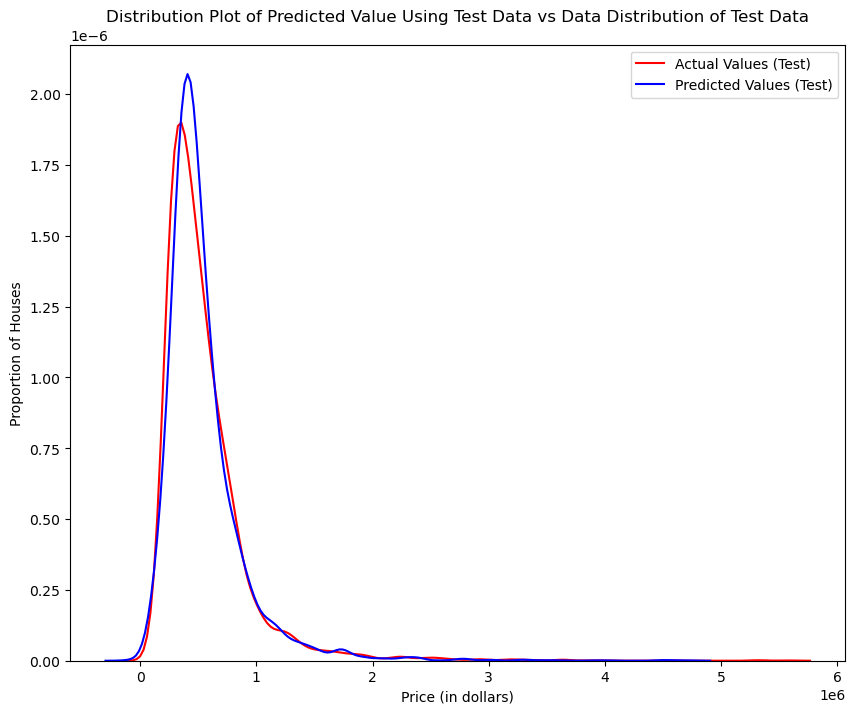

In [90]:
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y1_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

### Feature importance and diagnostics

In [92]:
ridge_model = best_model.named_steps['ridge']
feature_importance = ridge_model.coef_
print(f"Feature Importance: {feature_importance}")

Feature Importance: [-1.70764475e+03  9.42792360e+03  5.25485879e+04  9.83170083e+03
 -1.06516172e+04  4.15966765e+02  7.33880385e+03  2.22024653e+04
  8.64730266e+04  4.78319100e+04  1.90450072e+04 -1.86810175e+04
  7.61722622e+04 -5.59988352e+04  4.35763633e+04 -7.81472314e+03
  1.10566674e+03 -5.00359106e+04  4.48540285e+03  3.25079881e+02
 -5.01890105e+03 -9.51392779e+03  3.13723619e+03  1.29629264e+04
 -4.12164869e+03  1.55750600e+03 -5.92694126e+02  5.20762845e+03
 -1.02481851e+04 -3.47586357e+02 -8.90870781e+03 -3.37455962e+03
  7.78342159e+03  6.10089773e+03  2.50467087e+03 -5.54799642e+03
 -7.14127576e+02  1.82124406e+03 -2.18369126e+03  1.89947423e+04
 -1.01138972e+04 -1.50371031e+04  7.01418538e+02  4.78857402e+03
 -4.20992699e+03  4.62367616e+03  2.00715718e+04  1.80340162e+03
  1.22355127e+04  6.86751671e+03 -1.51443747e+04 -1.06375087e+04
  5.43871987e+03 -2.64333841e+03 -4.12348572e+03 -2.04919885e+03
  4.07768872e+01 -7.74889286e+03 -4.89000267e+03  7.46834358e+03
 -4.7

In [93]:
from tabulate import tabulate  

ridge_model = best_model.named_steps['ridge']

poly_transformer = best_model.named_steps['poly']
original_feature_names = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                          'waterfront', 'view', 'condition', 'grade', 'sqft_above', 
                          'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15', 
                          'sqft_lot15', 'yr_renovated_binned', 'zipcode_binned', 'month_house_sold']
feature_names = poly_transformer.get_feature_names_out(input_features=original_feature_names)

coefficients = ridge_model.coef_

# Combine feature names and coefficients
data = [(feature, f"{coef:.4f}") for feature, coef in zip(feature_names, coefficients)]

print(tabulate(data, headers=["Feature", "Coefficient"], tablefmt="grid"))

# Save the results to a CSV file
# Uncomment the lines below if saving is required
# import pandas as pd
# coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
# coeff_df.to_csv("ridge_model_coefficients.csv", index=False)
# print("\nCoefficients saved to 'ridge_model_coefficients.csv'")


+--------------------------------------+---------------+
| Feature                              |   Coefficient |
+======================================+===============+
| bedrooms                             |    -1707.64   |
+--------------------------------------+---------------+
| bathrooms                            |     9427.92   |
+--------------------------------------+---------------+
| sqft_living                          |    52548.6    |
+--------------------------------------+---------------+
| sqft_lot                             |     9831.7    |
+--------------------------------------+---------------+
| floors                               |   -10651.6    |
+--------------------------------------+---------------+
| waterfront                           |      415.967  |
+--------------------------------------+---------------+
| view                                 |     7338.8    |
+--------------------------------------+---------------+
| condition                    

#### SHAP values

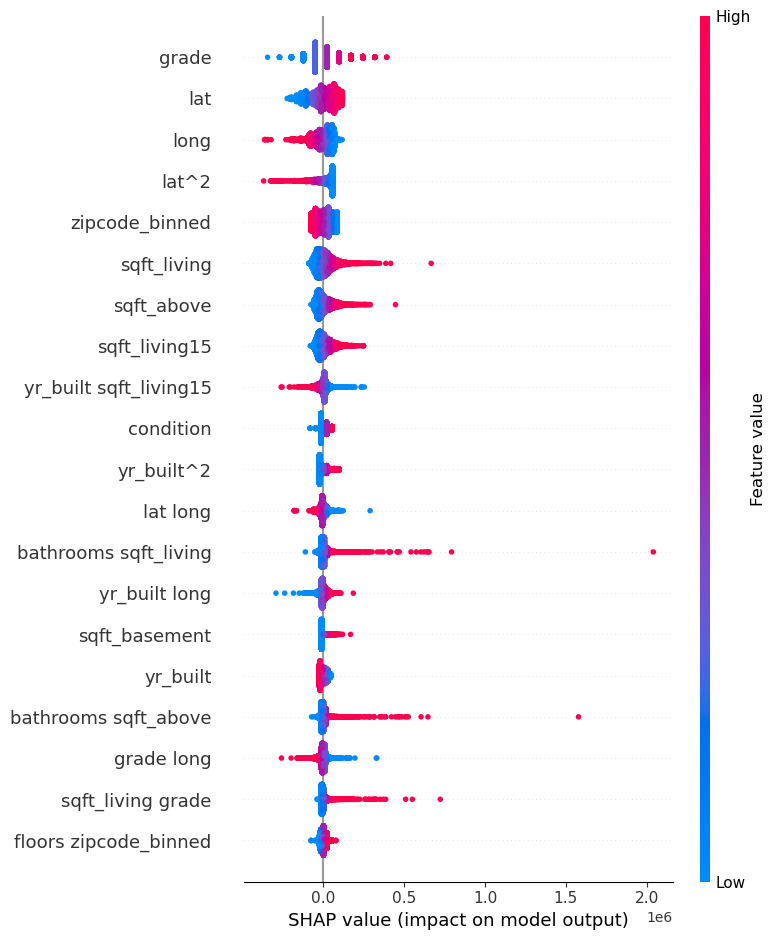

<Figure size 640x480 with 0 Axes>

In [95]:
import shap

original_feature_names = x1_train.columns  

scaler = best_model.named_steps['scaler']
poly = best_model.named_steps['poly']

x1_train_transformed = poly.transform(scaler.transform(x1_train))
x1_test_transformed = poly.transform(scaler.transform(x1_test))

# Get the feature names after polynomial transformation
poly_feature_names = poly.get_feature_names_out(input_features=original_feature_names)

explainer = shap.Explainer(best_model.named_steps['ridge'], x1_train_transformed)

# Compute SHAP values
shap_values = explainer(x1_test_transformed)

# Plot SHAP summary with actual feature names
shap.summary_plot(shap_values, x1_test_transformed, feature_names=poly_feature_names)

plt.savefig("shap_summary_plot.png", bbox_inches='tight') 

plt.show()


Analyze residuals to check for biases in the predictions

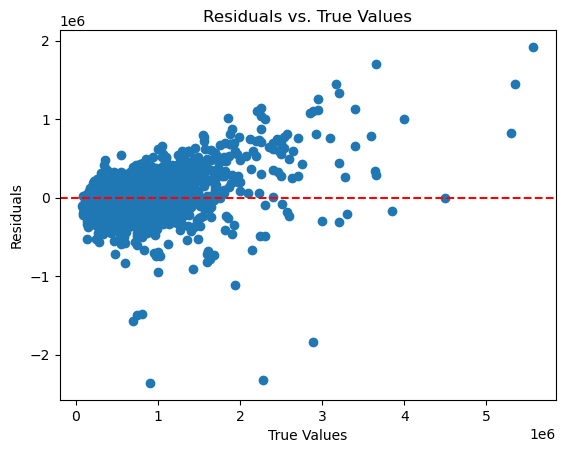

In [97]:
residuals = y1_test - yhat_test
plt.scatter(y1_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. True Values")
plt.savefig("residuals_plot.png", bbox_inches='tight') 
plt.show()


#### Insights:
Residuals seem to be randomly distributed around 0.

In [99]:
print(y1_test.head())
x1_test.head()

735       365000.0
2830      865000.0
4106     1038000.0
16218    1490000.0
19964     711000.0
Name: price, dtype: float64


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,yr_renovated_binned,zipcode_binned,month_house_sold
735,4,2,2070,8893,2,0,0,4,8,2070,1,1986,47.4388,-122.162,2390,7700,1,4,1878
2830,5,3,2900,6730,1,0,0,5,8,1830,1070,1977,47.6784,-122.285,2370,6283,1,5,1940
4106,4,2,3770,10893,2,0,2,3,11,3770,1,1997,47.5646,-122.129,3710,9685,1,1,1940
16218,3,3,4560,14608,2,0,2,3,12,4560,1,1990,47.6995,-122.228,4050,14226,1,3,1875
19964,3,2,2550,5376,2,0,0,3,9,2550,1,2004,47.6647,-122.083,2250,4050,1,3,2211


# Save the model

In [101]:
# ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
#  'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_renovated_binned',
#  'zipcode_binned', 'month_house_sold']

In [102]:
import joblib

# Save the best model
joblib.dump(best_model, 'best_pipeline_model.pkl')


['best_pipeline_model.pkl']